Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/Shared drives/ML+DDR/Machine Learning/Final Project/booking.csv'
data = pd.read_csv(file_path)
data_copy = data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
import numpy as np
from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, log_loss, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from scipy import stats
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

# EDA and Data Cleaning
1/ boxplots for each variable

2/ correlation matrix

3/ variable encoding for indicator variables (including response variable, canceled = 1)

Notes:
1. Some reservations are showing with a booking date of 02/29/2018, which is a non-existent date. So this is being updated to 3/1/2018


['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status']


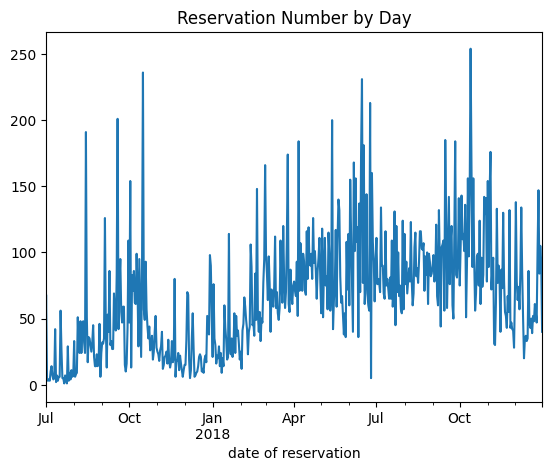

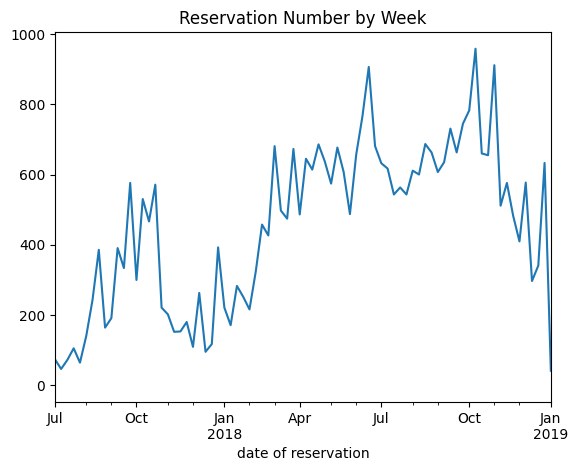

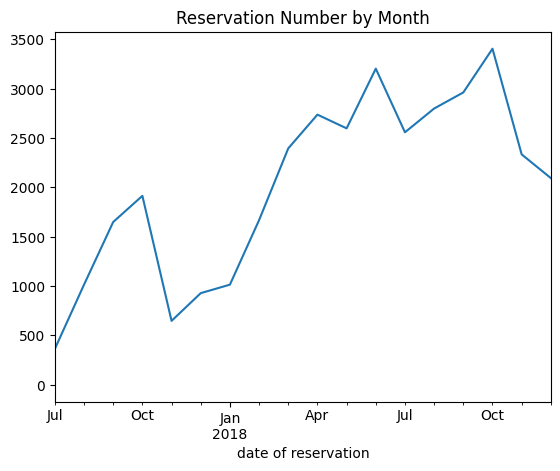

In [ ]:
# columns in dataframe
print(data_copy.columns.tolist())

# reservations over time
date = 'date of reservation'
data_copy[date] = data_copy[date].astype(str).replace('2018-2-29', '2018-03-01')

data_copy[date] = pd.to_datetime(data_copy[date], errors='coerce')

# by Day
data_copy.set_index(date, inplace=True)
time_series = data_copy.resample('D').size()
plt.figure()
time_series.plot()
plt.xlim("2017-07-01", "2018-12-31")
plt.title("Reservation Number by Day")
plt.show()

# by Week
time_series = data_copy.resample('W').size()
plt.figure()
time_series.plot()
plt.xlim("2017-07-01", "2018-12-31")
plt.title("Reservation Number by Week")
plt.show()

# by Month
time_series = data_copy.resample('M').size()
plt.figure()
time_series.plot()
plt.xlim("2017-07-01", "2018-12-31")
plt.title("Reservation Number by Month")
plt.show()
data_copy.reset_index(inplace=True)

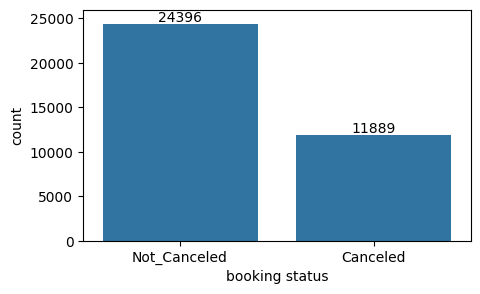

In [ ]:
# counts of canceled vs not canceled
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='booking status')

patches = plt.gca().patches
for patch in patches:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 700, f'{int(height)}',
             ha='center', va='center')

plt.ylim(0, 26000)
plt.show()

In [ ]:
# data prep
# data.drop(['Booking_ID', 'date of reservation'], axis=1, inplace=True)
# encoding indicator variables
indicator = ['type of meal', 'room type', 'market segment type']
indicators = pd.get_dummies(data[indicator])
data = data.drop(indicator, axis=1)
data = pd.concat([data, indicators], axis=1)

In [ ]:
print(data.columns.tolist())

['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status', 'type of meal_Meal Plan 1', 'type of meal_Meal Plan 2', 'type of meal_Meal Plan 3', 'type of meal_Not Selected', 'room type_Room_Type 1', 'room type_Room_Type 2', 'room type_Room_Type 3', 'room type_Room_Type 4', 'room type_Room_Type 5', 'room type_Room_Type 6', 'room type_Room_Type 7', 'market segment type_Aviation', 'market segment type_Complementary', 'market segment type_Corporate', 'market segment type_Offline', 'market segment type_Online']


In [ ]:
data['Canceled'] = data['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})
data.drop(['booking status', 'Booking_ID', 'date of reservation'], axis=1, inplace=True)
print(data.columns.tolist())
X = data.drop('Canceled', axis=1)
variables = X.columns.tolist()
y = data['Canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=122)

['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'type of meal_Meal Plan 1', 'type of meal_Meal Plan 2', 'type of meal_Meal Plan 3', 'type of meal_Not Selected', 'room type_Room_Type 1', 'room type_Room_Type 2', 'room type_Room_Type 3', 'room type_Room_Type 4', 'room type_Room_Type 5', 'room type_Room_Type 6', 'room type_Room_Type 7', 'market segment type_Aviation', 'market segment type_Complementary', 'market segment type_Corporate', 'market segment type_Offline', 'market segment type_Online', 'Canceled']


In [ ]:
X.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price', 'special requests',
       'type of meal_Meal Plan 1', 'type of meal_Meal Plan 2',
       'type of meal_Meal Plan 3', 'type of meal_Not Selected',
       'room type_Room_Type 1', 'room type_Room_Type 2',
       'room type_Room_Type 3', 'room type_Room_Type 4',
       'room type_Room_Type 5', 'room type_Room_Type 6',
       'room type_Room_Type 7', 'market segment type_Aviation',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online'],
      dtype='object')

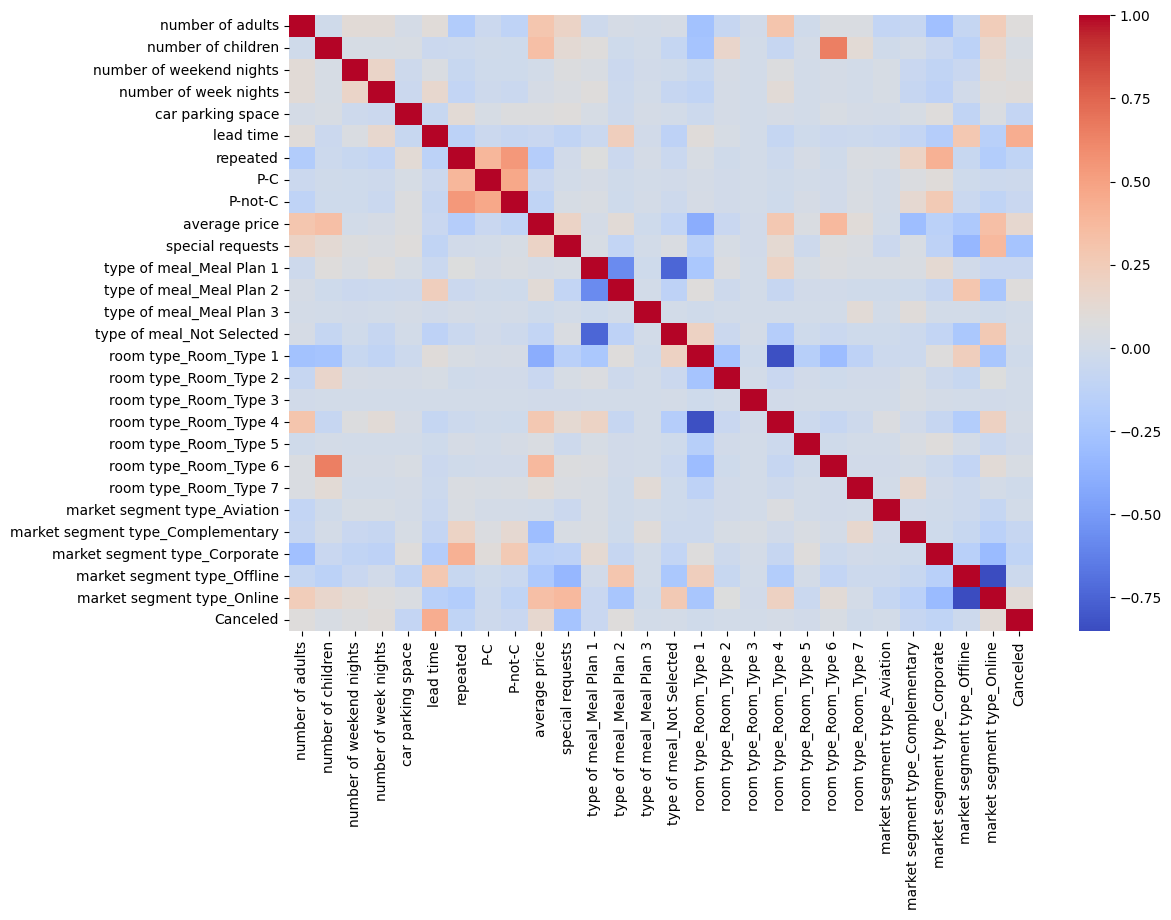

Features that are correlated include obvious ones, like previously-not-canceled and previously-canceled bookings, and repeated bookings. Number of children seems to be correlated with hotel room type 6.
Additionally, average room price and room type are moderately correlated. Looking at our response variable, whether a booking was canceled or not, we see some stronger correlations with special requests, lead time, and average price.


In [ ]:
# correlation matrix
correlation = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.show()

print("Features that are correlated include obvious ones, like previously-not-canceled and previously-canceled bookings, and repeated bookings. Number of children seems to be correlated with hotel room type 6.")
print("Additionally, average room price and room type are moderately correlated. Looking at our response variable, whether a booking was canceled or not, we see some stronger correlations with special requests, lead time, and average price.")

In [ ]:
for i in variables:
  sns.boxplot(x='Canceled', y=i, data=data)
  plt.title(f"Boxplot of {i} by Canceled/Not Canceled")
  plt.xlabel("Canceled vs Not Canceled")
  plt.ylabel(f"{i}")
  plt.show()

# Possible Models

In [ ]:
# function to evalue model performance (train vs test)
def model_performance(model, X_test, y_test):
  predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, predictions)
  accuracy = accuracy_score(y_test, predictions)
  cm = confusion_matrix(y_test, predictions)
  print(f"This model, using {model}, has an mse of {mse}. \n The accuracy is {round(accuracy*100,2)}%.\n")
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
  plt.xlabel('Predicted Label:')
  plt.ylabel('True Label:')
  plt.show

## Logistic Regression

This model, using LogisticRegression(multi_class='ovr', solver='liblinear'), has an mse of 0.20187405263883149. 
 The accuracy is 79.81%.



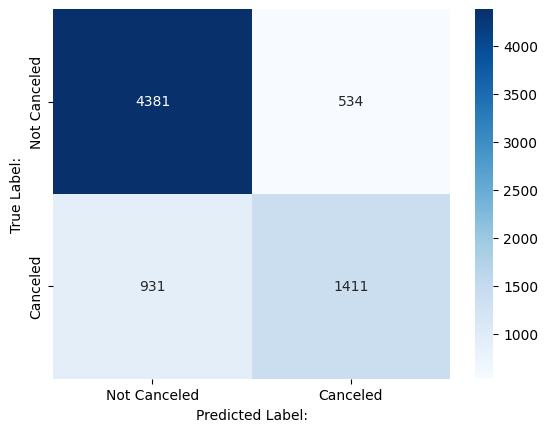

In [ ]:
logistic_regression = LogisticRegression(solver='liblinear', multi_class='ovr')
logistic_regression.fit(X_train, y_train)
model_performance(logistic_regression, X_test, y_test)

## Lasso Logistic Regression

This model, using LogisticRegressionCV(cv=5, penalty='l1', random_state=211, solver='liblinear'), has an mse of 0.20159845666253273. 
 The accuracy is 79.84%.

number of adults: 0.018804667725704678
number of children: 0.04727613745035362
number of weekend nights: 0.11030185617963642
number of week nights: 0.05585639939582428
car parking space: -0.25677282160577813
lead time: 1.3382074753128232
repeated: -0.26798561283913813
P-C: 0.048772877156008435
P-not-C: 0.0
average price: 0.6436870479960738
special requests: -1.1585579910353365
type of meal_Meal Plan 1: -0.026529829077986653
type of meal_Meal Plan 2: 0.0
type of meal_Meal Plan 3: 0.016096645969224267
type of meal_Not Selected: 0.06748929147979012
room type_Room_Type 1: 0.08231086359520186
room type_Room_Type 2: -0.016148639311307358
room type_Room_Type 3: 0.0
room type_Room_Type 4: 0.0
room type_Room_Type 5: -0.037651835545314906
room type_Room_Type 6: -0.11540563206283286
room type_Room_Type 7: -0.06664058185502054
market segmen

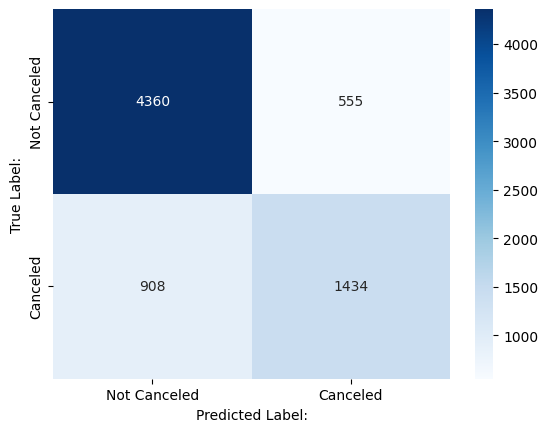

In [ ]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.fit_transform(X_test)

lasso_logistic_regression_cv = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, random_state=211)
lasso_logistic_regression_cv.fit(X_train2, y_train)
model_performance(lasso_logistic_regression_cv, X_test2, y_test)

names = X_train.columns
coefficients = lasso_logistic_regression_cv.coef_[0]

print("Coefficients for X variables:")
for feature, coef in zip(names, coefficients):
  print(f"{feature}: {coef}")



## Elastic Net Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

This model, using LogisticRegressionCV(cv=5, l1_ratios=[0.1, 0.5, 0.9], penalty='elasticnet',
                     random_state=211, solver='saga'), has an mse of 0.2022874466032796. 
 The accuracy is 79.77%.



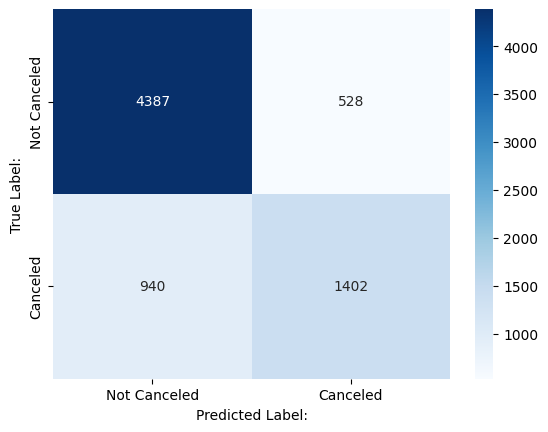

In [ ]:
elastic_net_logistic_regression = LogisticRegressionCV(penalty = 'elasticnet', solver='saga', l1_ratios=[0.1,0.5,0.9], cv=5, random_state=211)
elastic_net_logistic_regression.fit(X_train2, y_train)
model_performance(elastic_net_logistic_regression, X_test2, y_test)

coefficients = elastic_net_logistic_regression.coef_[0]

print("Coefficients for X variables:")
for feature, coef in zip(names, coefficients):
  print(f"{feature}: {coef}")


## Principal Component - Logistic Regression

[1.22789151e-01 9.22594205e-02 7.96129335e-02 6.44915143e-02
 5.68299455e-02 4.83025500e-02 4.77196799e-02 4.24167256e-02
 3.98067239e-02 3.81050908e-02 3.71176425e-02 3.63412500e-02
 3.56161498e-02 3.28278395e-02 3.20169629e-02 3.13663770e-02
 3.02526091e-02 2.64345194e-02 2.49775562e-02 2.21990862e-02
 1.76751783e-02 1.57111311e-02 1.33500569e-02 1.17799061e-02
 1.39481820e-32 5.62034699e-33 2.33625481e-33]
Based on this plot, we will run a PCA logistic regression with 5 components.
This model, using LogisticRegression(), has an mse of 0.2691194708557255. 
 The accuracy is 73.09%.

This model clearly overestimates predictions - it is classifying cancellations pretty accurately, but it is not classifying non-cancellations well.


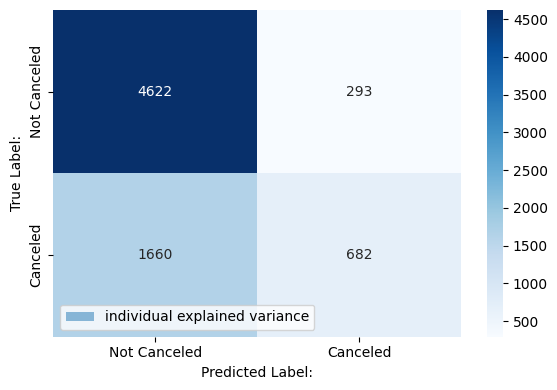

In [ ]:
# for PCA we will use scaled data
pca = PCA()
X_train_pca = pca.fit_transform(X_train2)
X_test_pca = pca.transform(X_test2)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

print("Based on this plot, we will run a PCA logistic regression with 5 components.")

PCA_5 = LogisticRegression()
PCA_5.fit(X_train_pca[:,:5], y_train)
model_performance(PCA_5, X_test_pca[:,:5], y_test)

print("This model clearly overestimates predictions - it is classifying cancellations pretty accurately, but it is not classifying non-cancellations well.")

## K Nearest Neighbors


This model, using KNeighborsClassifier(), has an mse of 0.15047540305911533. 
 The accuracy is 84.95%.



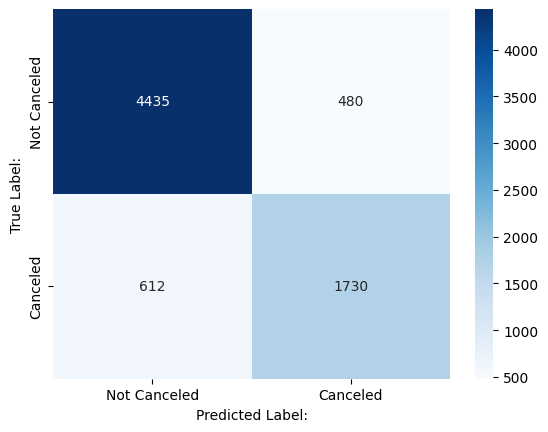

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train2, y_train)
model_performance(KNN, X_test2, y_test)

## Support Vector Machine

This model, using SVC(), has an mse of 0.17913738459418493. 
 The accuracy is 82.09%.



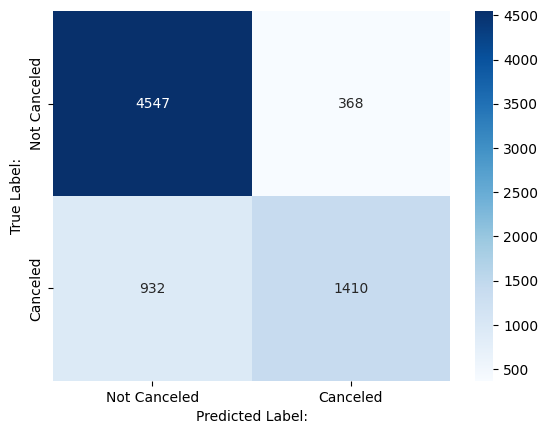

In [ ]:
SVC_model = SVC()
SVC_model.fit(X_train2, y_train)
model_performance(SVC_model, X_test2, y_test)

## AdaBoost

This model, using AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.1), has an mse of 0.14330990767534793. 
 The accuracy is 85.67%.



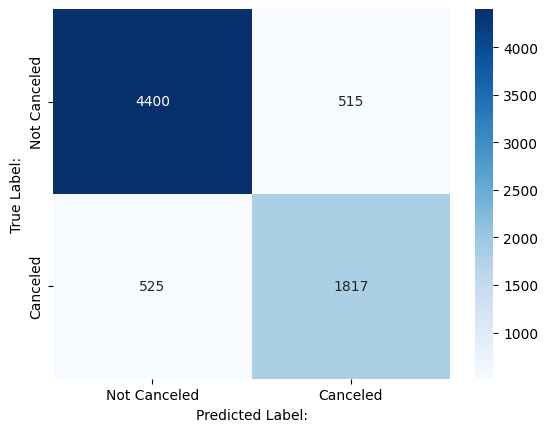

In [ ]:
AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1)
AdaBoost.fit(X_train, y_train)
model_performance(AdaBoost, X_test, y_test)

## XGBoosted Tree

This model, using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), has an mse of 0.1185062698084608. 
 The accuracy is 88.15%.



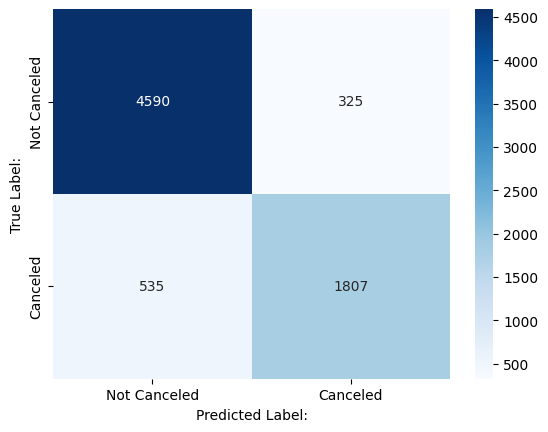

In [ ]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
model_performance(XGB_model, X_test, y_test)

## One Decision Tree (CART)

This model, using DecisionTreeClassifier(random_state=122), has an mse of 0.14124293785310735. 
 The accuracy is 85.88%.

Since it is a large tree we will just visualize the first levels.


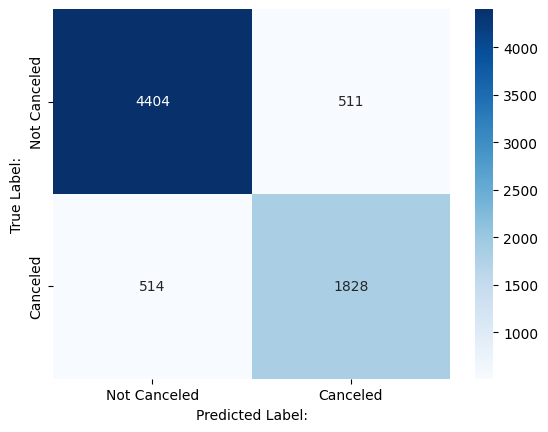

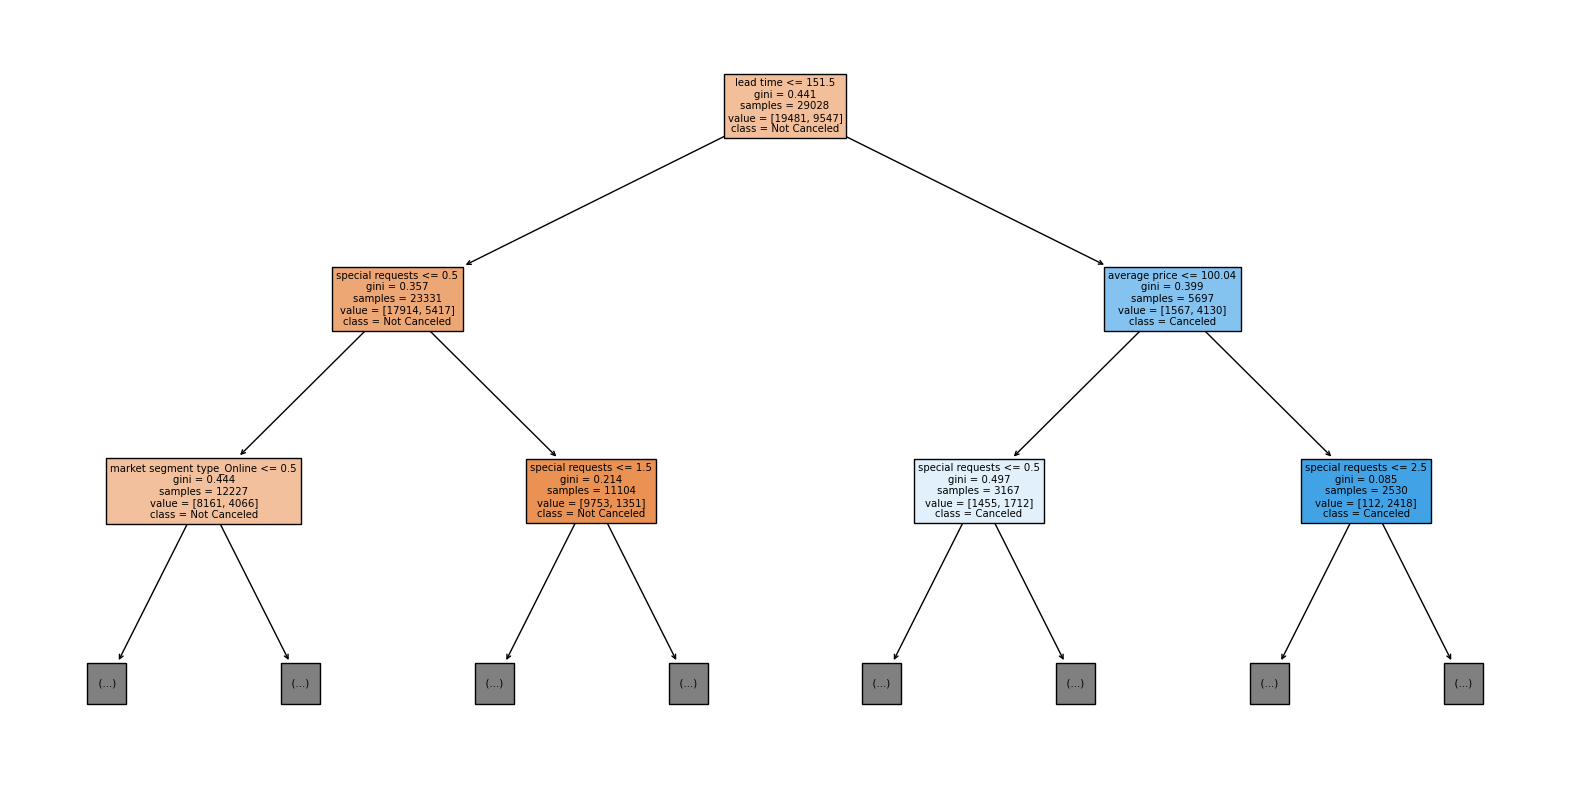

In [ ]:
cart_model = DecisionTreeClassifier(random_state=122)
cart_model.fit(X_train, y_train)
model_performance(cart_model, X_test, y_test)

# visualization of tree
print("Since it is a large tree we will just visualize the first 2 levels.")
plt.figure(figsize=(20,10))
plot_tree(cart_model, filled=True, feature_names=variables, class_names=["Not Canceled", "Canceled"], max_depth=2 )
plt.show()

## Random Forest

This model, using RandomForestClassifier(n_estimators=500, oob_score=True, random_state=122), has an mse of 0.1113407744246934. 
 The accuracy is 88.87%.



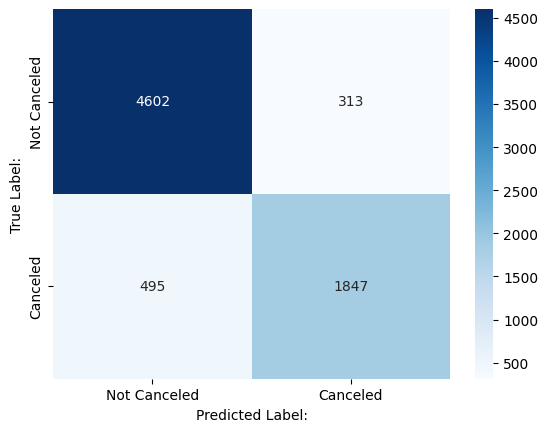

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state = 122, oob_score=True)
rf_model.fit(X_train, y_train)
model_performance(rf_model, X_test, y_test)

## Partial Lasso

In [ ]:
class SelectiveRegularizationLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, penalty_weights, tol=1e-4, max_iter=100):
        self.penalty_weights = penalty_weights
        self.tol = tol
        self.max_iter = max_iter

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, coef, X, y):
        predictions = self._sigmoid(X @ coef)
        basic_loss = log_loss(y, predictions)
        # Apply regularization to all coefficients except the intercept
        reg_term = sum(self.penalty_weights * abs(coef[1:]))  # Skip intercept
        return basic_loss + reg_term

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term
        initial_coef = np.zeros(X.shape[1])
        result = minimize(self._loss, initial_coef, args=(X, y), method='SLSQP', tol=self.tol, options={'maxiter': self.max_iter})
        self.coef_ = result.x
        return self

    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term
        proba = self._sigmoid(X @ self.coef_)
        return np.vstack([1-proba, proba]).T

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)

penalty_weight_options = np.linspace(0.01, 1.0, 10)

best_score = np.inf
best_weight = None

for penalty_weight in penalty_weight_options:

    penalty_weights = penalty_weight

    model = SelectiveRegularizationLogisticRegression(penalty_weights=penalty_weights)
    model.fit(X_train, y_train)

    val_predictions = model.predict_proba(X_test)
    score = log_loss(y_test, val_predictions)

    if score < best_score:
        best_score = score
        best_weight = penalty_weight

print(f"Best penalty weight: {best_weight}")

final_model = SelectiveRegularizationLogisticRegression(penalty_weights=best_weight)
final_model.fit(X_train, y_train)

<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-i

Best penalty weight: 0.01


<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-35-77d4a98ddb1e>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


SelectiveRegularizationLogisticRegression(penalty_weights=0.01)

# Random Forest Deep Dive

Since our Random Forest model outperforms all other models considered, we will use this model to determine what features are important / drive cancellation for hotel bookings.

In [ ]:
# mean decrease in impurity
mean_decrease_impurity = rf_model.feature_importances_

for i, importance in enumerate(mean_decrease_impurity):
    print(f"{i} mean decrease in impurity: {importance}")

print("MDI counts the times a feature is used to split a node, weight by the number of samples it splits. This measure showcases how important a feature is for the splits in the trees.")

# permutation feature importance
output = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=122)

for i, importance in enumerate(output.importances_mean):
    print(f"{[i]} permutation: {importance}")
print("permutation feature calculation includes an intermediate calculation of the out of sample model prediction accuracy. Then, the values for the variable are randomly permutated (hence the name) and the accuracy is calculated again. If accuracy decreases, this means that the variable is important in the random forest.")

0 mean decrease in impurity: 0.02636250139233533
1 mean decrease in impurity: 0.007881979222799458
2 mean decrease in impurity: 0.04333434261632985
3 mean decrease in impurity: 0.06519904517331103
4 mean decrease in impurity: 0.007129978703968331
5 mean decrease in impurity: 0.4118146915276996
6 mean decrease in impurity: 0.0022421945707860424
7 mean decrease in impurity: 0.0004766366008250142
8 mean decrease in impurity: 0.0019272484381713856
9 mean decrease in impurity: 0.24048932867331832
10 mean decrease in impurity: 0.10777280989265058
11 mean decrease in impurity: 0.006661651632984179
12 mean decrease in impurity: 0.007480141280526758
13 mean decrease in impurity: 4.693993603328233e-05
14 mean decrease in impurity: 0.0048778426512337434
15 mean decrease in impurity: 0.005925240282771778
16 mean decrease in impurity: 0.0020249200213845746
17 mean decrease in impurity: 4.9733715964849574e-05
18 mean decrease in impurity: 0.0055359413638165775
19 mean decrease in impurity: 0.0016437

Feature Importance by Mean Decrease Impurity:


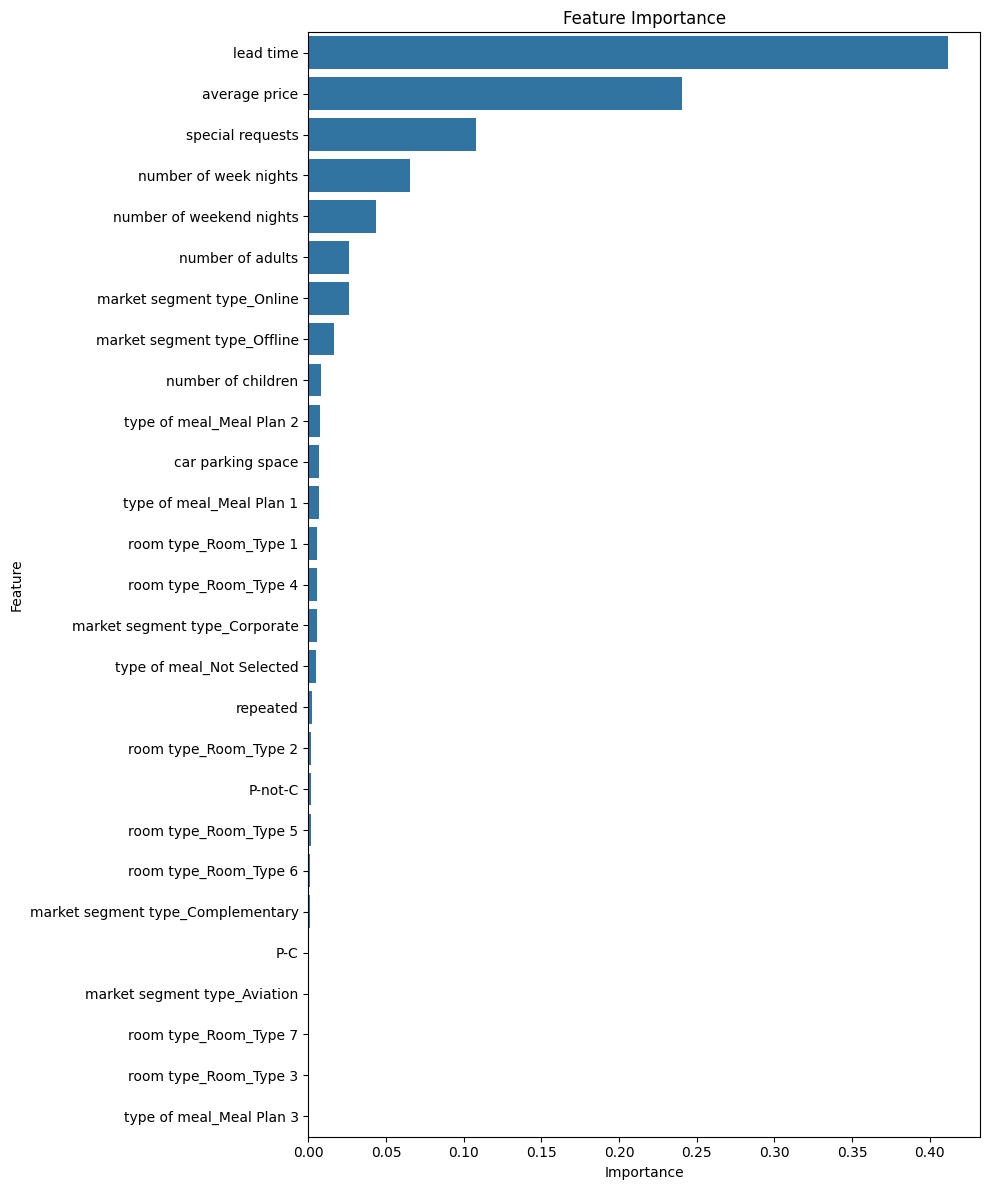

Feature Importance by Permutation Feature Calculation:


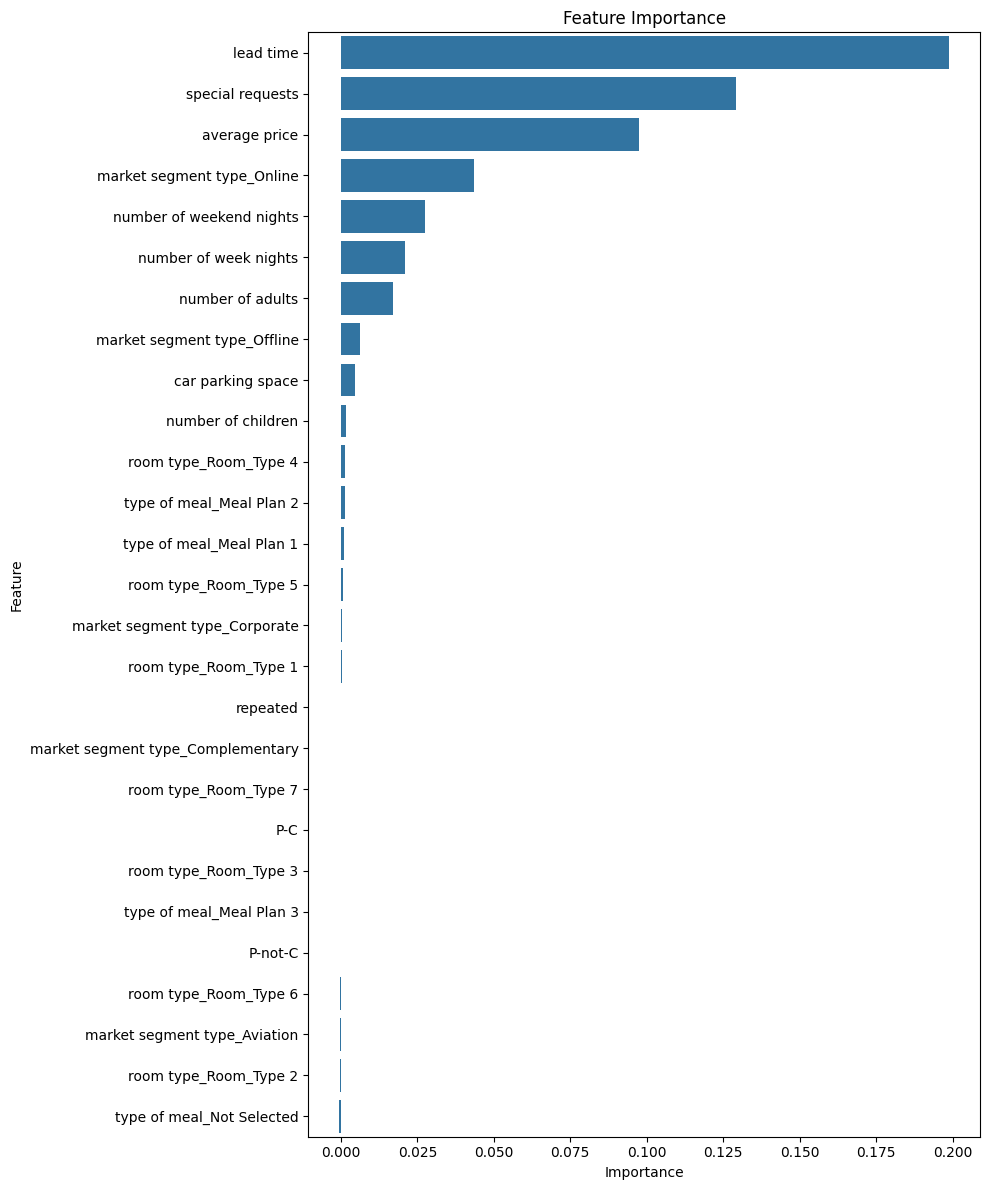

In [ ]:
mdi_dataframe = pd.DataFrame({'Feature': variables, 'Importance': mean_decrease_impurity})
permutation_dataframe = pd.DataFrame({'Feature': variables, 'Importance': output.importances_mean})

def PlotFeatureImportance(importance_df):
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 12))
    sns.barplot(x='Importance', y='Feature',  data=importance_df, orient='h')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

print("Feature Importance by Mean Decrease Impurity:")
PlotFeatureImportance(mdi_dataframe)
print("Feature Importance by Permutation Feature Calculation:")
PlotFeatureImportance(permutation_dataframe)

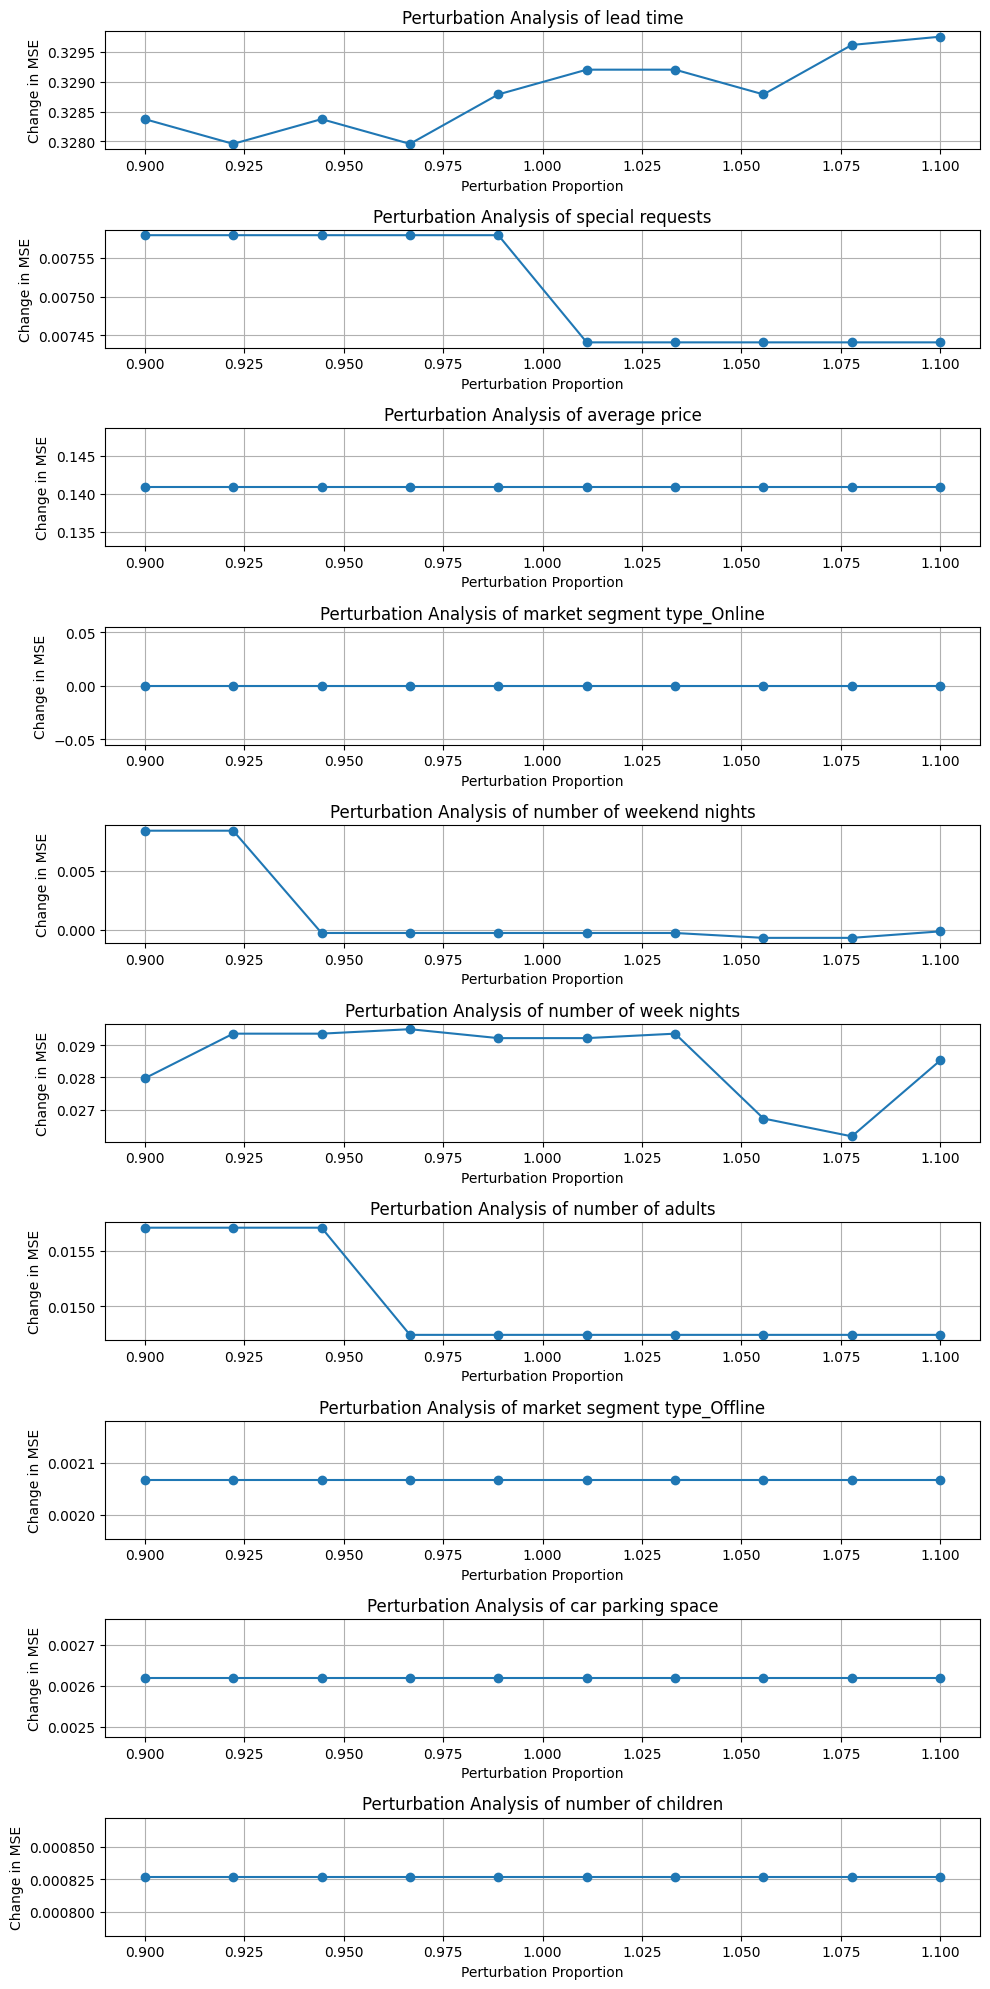

In [ ]:
## Perturbation Analysis for the top 10 features from the Feature Importance chart

# Top 10 Variable names from the feature importance chart
variables_to_perturb = [
    'lead time', 'special requests', 'average price',
    'market segment type_Online', 'number of weekend nights',
    'number of week nights', 'number of adults',
    'market segment type_Offline', 'car parking space',
    'number of children'
]

# Original predictions and MSE
original_predictions = rf_model.predict(X_test)
original_mse = mean_squared_error(y_test, original_predictions)

# Dictionary to store MSE changes for each variable
mse_changes = {variable: [] for variable in variables_to_perturb}

# Perturbation range: +/- 10% of the mean value of each variable
for variable in variables_to_perturb:
    mean_value = X_test[variable].mean()
    perturbations = np.linspace(0.9 * mean_value, 1.1 * mean_value, 10)

    for perturb in perturbations:
        # Create a copy of the test data
        X_perturbed = X_test.copy()
        # Perturb the selected feature
        X_perturbed[variable] = X_perturbed[variable] * perturb
        # Make predictions with the perturbed data
        perturbed_predictions = rf_model.predict(X_perturbed)
        # Calculate the MSE
        perturbed_mse = mean_squared_error(y_test, perturbed_predictions)
        # Calculate the change in MSE due to perturbation
        mse_change = perturbed_mse - original_mse
        # Store the results
        mse_changes[variable].append(mse_change)

# Plot the perturbation results
fig, axs = plt.subplots(len(variables_to_perturb), 1, figsize=(10, 20))

for i, variable in enumerate(variables_to_perturb):
    axs[i].plot(perturbations / mean_value, mse_changes[variable], marker='o')
    axs[i].set_title(f'Perturbation Analysis of {variable}')
    axs[i].set_xlabel('Perturbation Proportion')
    axs[i].set_ylabel('Change in MSE')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


## Interpretations:
The perturbation analysis show how the prediction error of the RF model (measured by change in Mean Squared Error, MSE) responds to changes in input features.

Lead Time: As lead time increases, MSE also increases. This suggests that lead time has a significant impact on predictions; longer planning periods may be associated with higher uncertainty in booking cancellations.

Special Requests: The sharp decrease in MSE with increasing special requests implies that the more special requests made, the more predictable the outcome becomes, perhaps indicating that guests with specific needs are less likely to cancel.

Average Price: There's a consistent but small change in MSE across the perturbation proportion. This suggests average price has a somewhat stable influence on cancellation predictions; changes in price don't dramatically affect prediction error.

Market Segment Type - Online: The negative change in MSE indicates that the model becomes more accurate as the presence of online bookings increases. It could mean online market segments are a strong predictor for booking behavior.

Number of Weekend Nights: The MSE changes very little, implying the number of weekend nights is not a critical factor in predicting cancellations in this model.

Number of Week Nights: There's a slight increase in MSE as the number of week nights changes, suggesting this feature has a modest effect on the prediction of cancellations.

Number of Adults: The decrease in MSE as the number of adults increases suggests that bookings with more adults are less likely to be canceled, potentially due to more commitment to the reservation.

Market Segment Type - Offline: The near-flat line indicates the offline market segment type has little effect on the prediction of cancellations in this model.

Car Parking Space: Similar to the number of weekend nights and the offline market segment, the car parking space feature does not significantly influence the prediction error.

Number of Children: Again, a relatively flat line indicating that the number of children included in a reservation does not substantially affect the prediction of cancellations.

From these interpretations, it seems that certain features like lead time and special requests have a more significant impact on the predictability of cancellations, while others such as the number of children or parking space requirements are less influential. These insights could be valuable for making business decisions around prioritizing customer segments, adjusting pricing strategies, or managing inventory based on predicted cancellation rates.

<Figure size 1000x800 with 0 Axes>

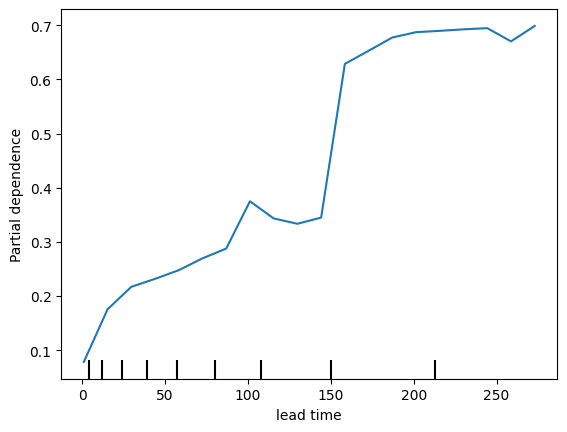

<Figure size 1000x800 with 0 Axes>

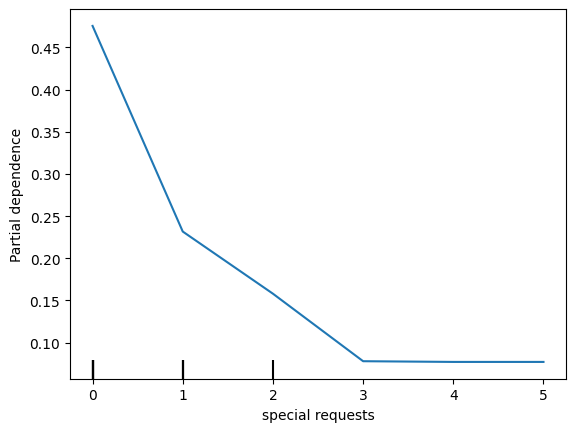

<Figure size 1000x800 with 0 Axes>

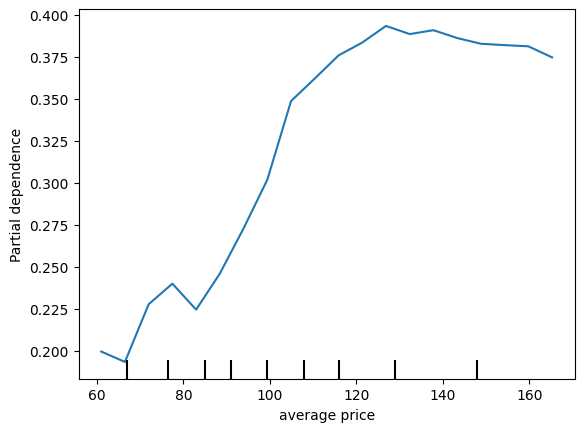

<Figure size 1000x800 with 0 Axes>

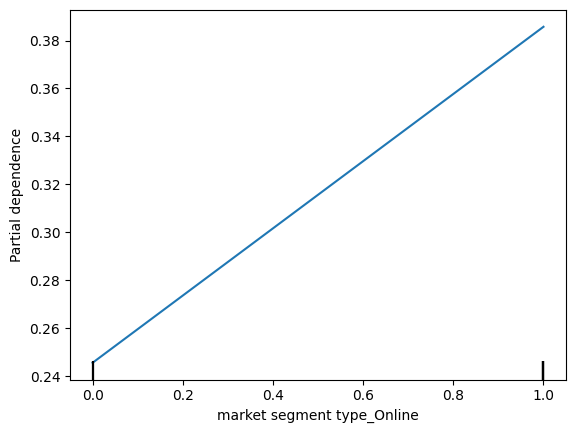

<Figure size 1000x800 with 0 Axes>

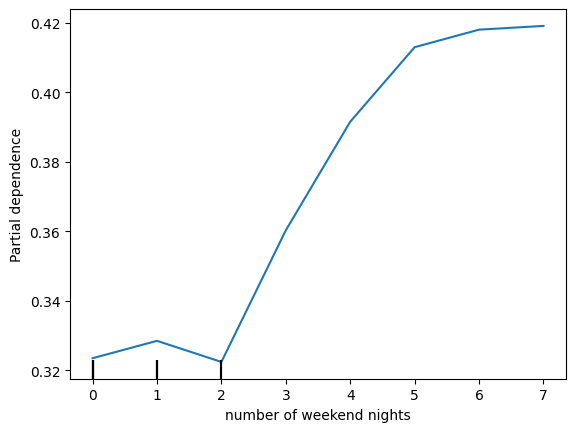

<Figure size 1000x800 with 0 Axes>

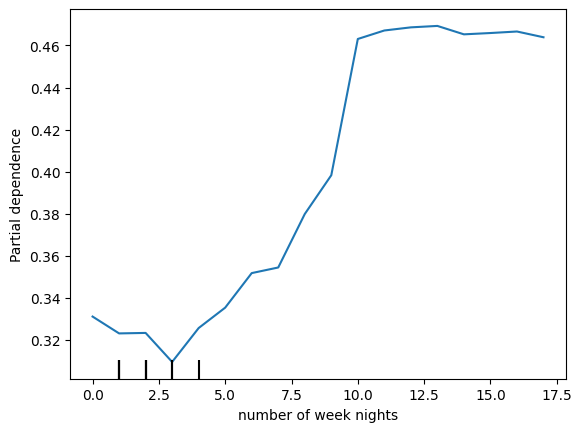

<Figure size 1000x800 with 0 Axes>

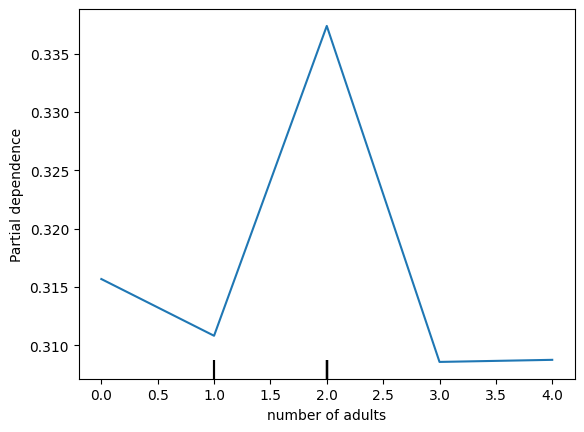

<Figure size 1000x800 with 0 Axes>

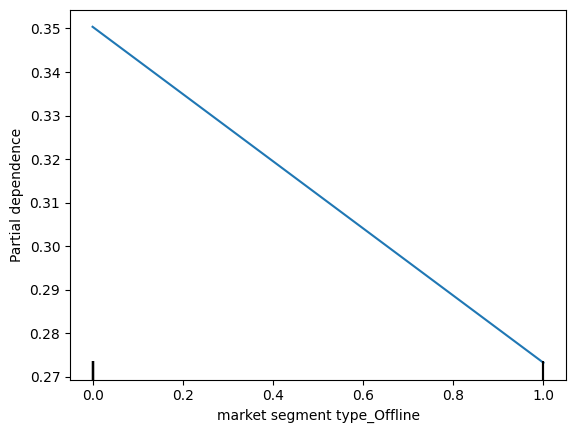

<Figure size 1000x800 with 0 Axes>

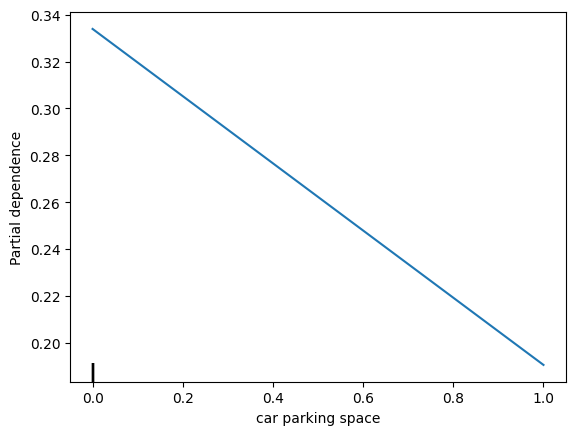

<Figure size 1000x800 with 0 Axes>

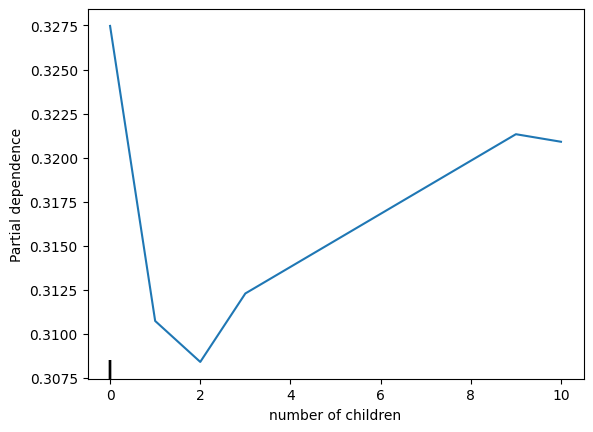

In [ ]:
# furthermore use partial dependence plots to determine the relationships

dep_var = [
    'lead time', 'special requests', 'average price',
    'market segment type_Online', 'number of weekend nights',
    'number of week nights', 'number of adults',
    'market segment type_Offline', 'car parking space',
    'number of children'
]

for feature in dep_var:
  plt.figure(figsize=(10,8))
  PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[feature], kind="average", grid_resolution=20)
  plt.show()